In [29]:
import numpy as np
import pandas as pd 
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


In [30]:
df=pd.read_csv('https://raw.githubusercontent.com/vedang1610/Python-Programs/main/titanic-training-data.csv')

In [31]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
df.shape

(891, 12)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [34]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [35]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Analyse the Data

<Axes: xlabel='Survived', ylabel='count'>

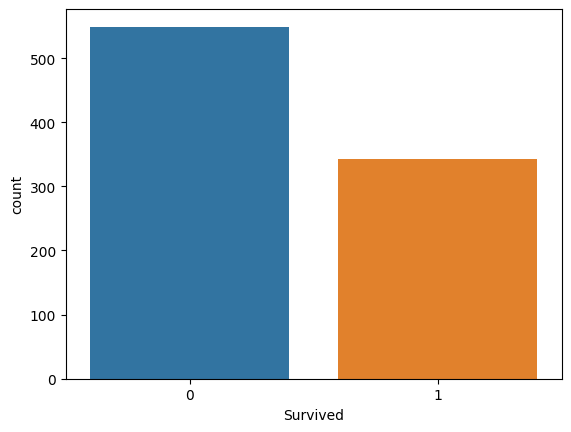

In [36]:
sns.countplot(x="Survived",data=df)

In [37]:
pd.crosstab(df["Survived"],df["Sex"])

Sex,female,male
Survived,,
0,81,468
1,233,109


<Axes: xlabel='Survived', ylabel='count'>

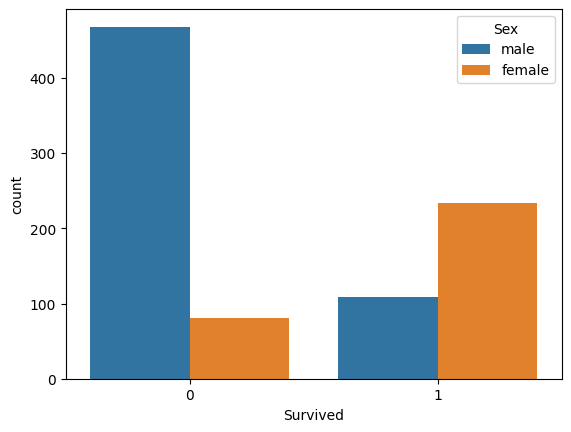

In [38]:
sns.countplot(x="Survived",hue="Sex",data=df)

<Axes: xlabel='Survived', ylabel='count'>

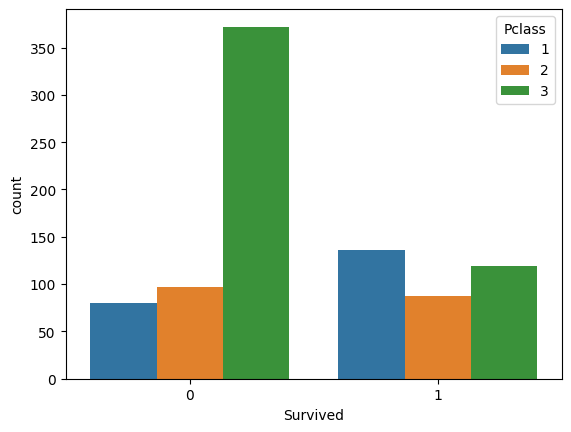

In [39]:
sns.countplot(x="Survived",hue="Pclass",data=df)

<Axes: xlabel='Pclass', ylabel='Age'>

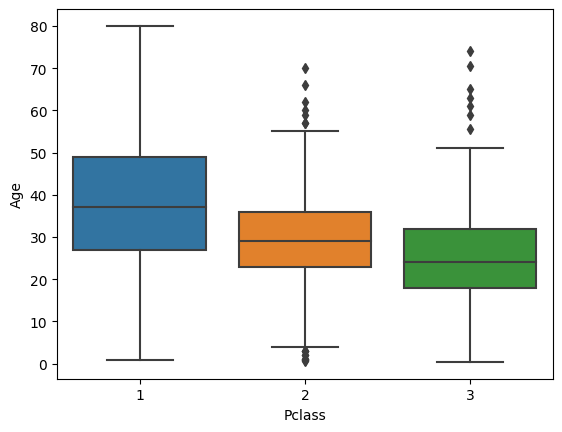

In [40]:
sns.boxplot(x="Pclass",y="Age",data=df)

In [41]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [42]:
df.drop("Cabin",axis=1,inplace=True)

In [43]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [44]:
df.shape

(891, 11)

In [45]:
df.dropna(inplace=True)

In [46]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [47]:
df.shape

(712, 11)

In [48]:
df=pd.get_dummies(df,columns=["Sex","Pclass","Embarked"])

In [49]:
df.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0,1,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,0,0,1,0,0,1


In [52]:
df=df.drop(["Name","PassengerId","Ticket","Fare"],axis=1)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    712 non-null    int64  
 1   Age         712 non-null    float64
 2   SibSp       712 non-null    int64  
 3   Parch       712 non-null    int64  
 4   Sex_female  712 non-null    uint8  
 5   Sex_male    712 non-null    uint8  
 6   Pclass_1    712 non-null    uint8  
 7   Pclass_2    712 non-null    uint8  
 8   Pclass_3    712 non-null    uint8  
 9   Embarked_C  712 non-null    uint8  
 10  Embarked_Q  712 non-null    uint8  
 11  Embarked_S  712 non-null    uint8  
dtypes: float64(1), int64(3), uint8(8)
memory usage: 33.4 KB


In [54]:
x=df.drop("Survived",axis=1)
y=df["Survived"]

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [63]:
model=LogisticRegression()

In [64]:
model.fit(x_train,y_train)

LogisticRegression()

In [66]:
model.score(x_train,y_train)

0.8052208835341366

In [67]:
model.score(x_test,y_test)

0.780373831775701

In [68]:
predictions=model.predict(x_test)

In [72]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.780373831775701

In [80]:
from sklearn import metrics

<Axes: >

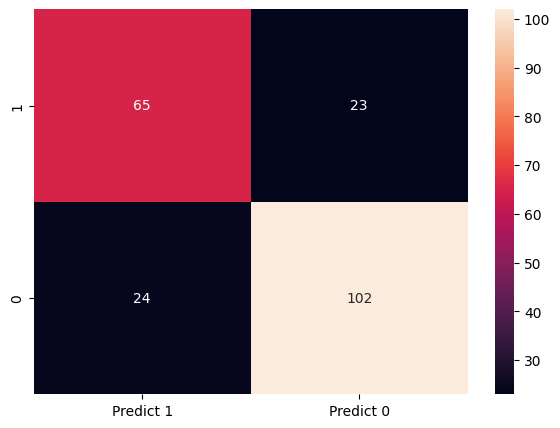

In [81]:
cm=metrics.confusion_matrix(y_test,predictions,labels=[1,0])
df_cm=pd.DataFrame(cm,index=[i for i in["1","0"]],
                   columns=[i for i in ["Predict 1","Predict 0"]] )
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [82]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81       126
           1       0.73      0.74      0.73        88

    accuracy                           0.78       214
   macro avg       0.77      0.77      0.77       214
weighted avg       0.78      0.78      0.78       214



In [83]:
from sklearn.tree import DecisionTreeClassifier

In [99]:
model2=DecisionTreeClassifier()


In [88]:
model2.fit(x_train,y_train)


DecisionTreeClassifier()

In [90]:
print(model2.score(x_train,y_train))

0.9598393574297188


In [96]:
print(model2.score(x_test,y_test))

0.7757009345794392


In [97]:
model2_reg=DecisionTreeClassifier(max_depth=3,criterion='entropy')


In [98]:
model2_reg.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [94]:
print(model2_reg.score(x_train,y_train))


0.8192771084337349


In [95]:
print(model2_reg.score(x_test,y_test))

0.7897196261682243


In [100]:
model3=DecisionTreeClassifier(max_depth=3)

In [101]:
model3.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [102]:
model3.score(x_train,y_train)

0.8192771084337349

In [103]:
model3.score(x_test,y_test)

0.7897196261682243